                                                Project Name :- Stock Market Performance Analysis       

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\stocks.csv')

# Display the first few rows of the dataset
print("Initial Data:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with all NaN values
df.dropna(how='all', inplace=True)

# Fill missing values with appropriate values or drop columns/rows if necessary
# For simplicity, let's fill numerical columns with 0 and categorical columns with the mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(0, inplace=True)

# Check for duplicate rows
print("\nNumber of duplicate rows: ", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert data types if necessary
# For example, if a column should be numeric but is stored as a string, convert it
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# Optionally, remove outliers
# For example, using z-score or IQR method, here is an example with IQR:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display cleaned data
print("\nCleaned Data:")
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv(r'C:\Users\welcome\OneDrive\Desktop\Cleaned_Airline_Delay_Cause.csv', index=False)


Initial Data:
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Missing values per column:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Number of duplicate rows:  0

Cleaned Data:
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  1

In [2]:
import pandas as pd

# Assuming your data is stored in a DataFrame called `df`
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to weekly frequency, taking the last closing price of each week
weekly_data = df.resample('W').last()

# Resample to monthly frequency, taking the last closing price of each month
monthly_data = df.resample('M').last()

# Display the resampled data
print("Weekly Resampled Data:")
print(weekly_data.head())

print("Monthly Resampled Data:")
print(monthly_data.head())


Weekly Resampled Data:
           Ticker       Open       High        Low      Close  Adj Close  \
Date                                                                       
2023-02-12   GOOG  95.739998  97.019997  94.529999  94.860001  94.860001   
2023-02-19   GOOG  95.070000  95.750000  93.449997  94.589996  94.589996   
2023-02-26   GOOG  89.629997  90.129997  88.860001  89.349998  89.349998   
2023-03-05   GOOG  92.739998  94.110001  92.660004  94.019997  94.019997   
2023-03-12   GOOG  92.500000  93.180000  90.800003  91.010002  91.010002   

              Volume  
Date                  
2023-02-12  49325300  
2023-02-19  31095100  
2023-02-26  31295600  
2023-03-05  30242500  
2023-03-12  32850100  
Monthly Resampled Data:
           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-28   GOOG   89.540001   91.449997   89.519997   90.300003   90.300003   
2023-03-31   GOO

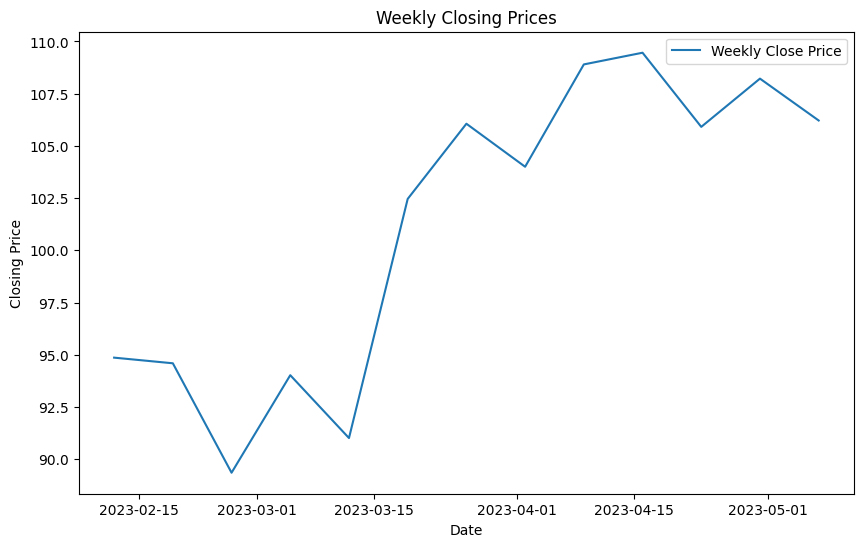

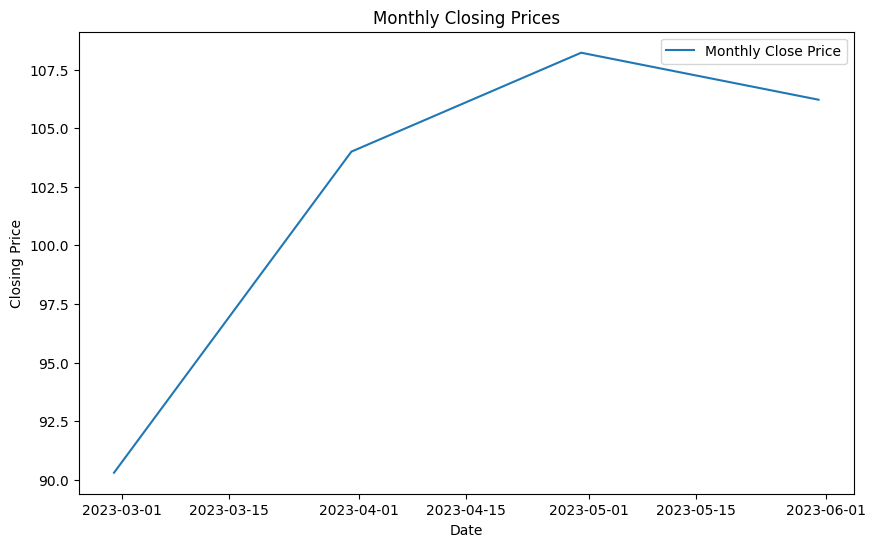

In [3]:
import matplotlib.pyplot as plt

# Plot weekly data
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Close'], label='Weekly Close Price')
plt.title('Weekly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot monthly data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Close'], label='Monthly Close Price')
plt.title('Monthly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [4]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/a1/35/183d32551447e280032b2331738cd850da435a42f850b71ebeaab42c1313/lxml-5.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/f2/ad/8881e55bcdc84ecf5d337f17fe0747b70f43f9dd93aaeb0c8fe169b8be5d/frozendict-2.4.4-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.8 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\welcome\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%%**********************]  4 of 4 completed


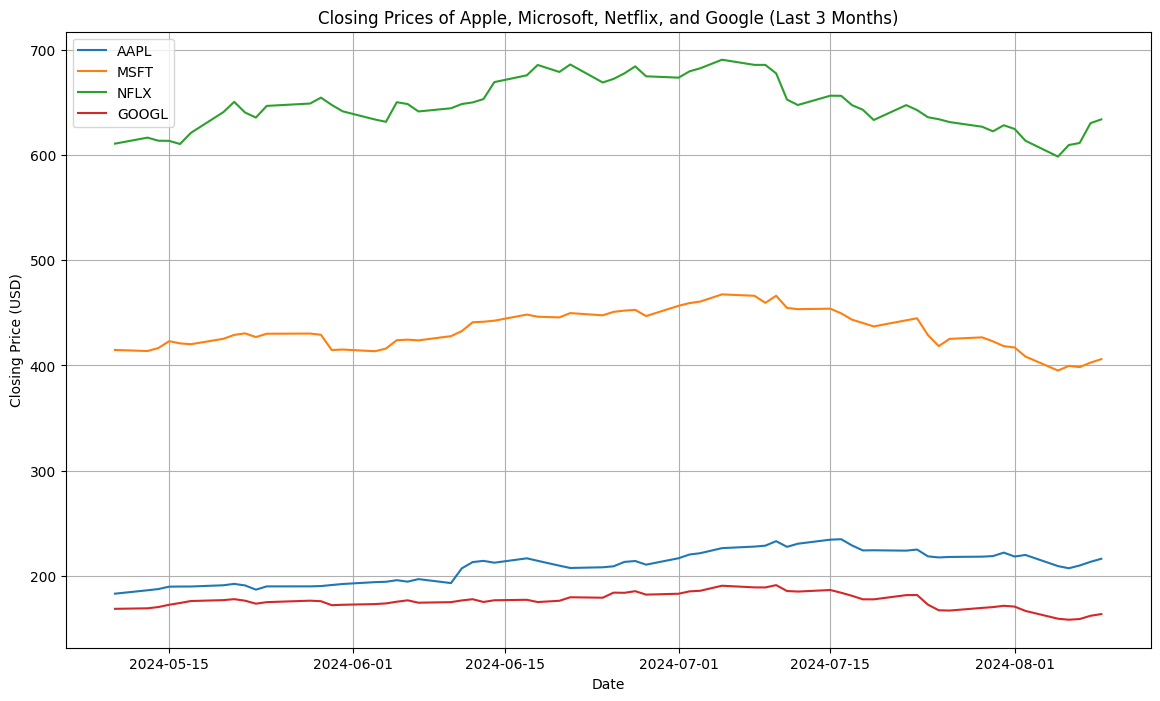

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for the last three months
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
stock_data = yf.download(tickers, period='3mo', group_by='ticker')

# Plotting the closing prices for each stock
plt.figure(figsize=(14, 8))

for ticker in tickers:
    plt.plot(stock_data[ticker]['Close'], label=ticker)

plt.title('Closing Prices of Apple, Microsoft, Netflix, and Google (Last 3 Months)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
pip install mplfinance


  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   -------------------------------------- - 71.7/75.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\welcome\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


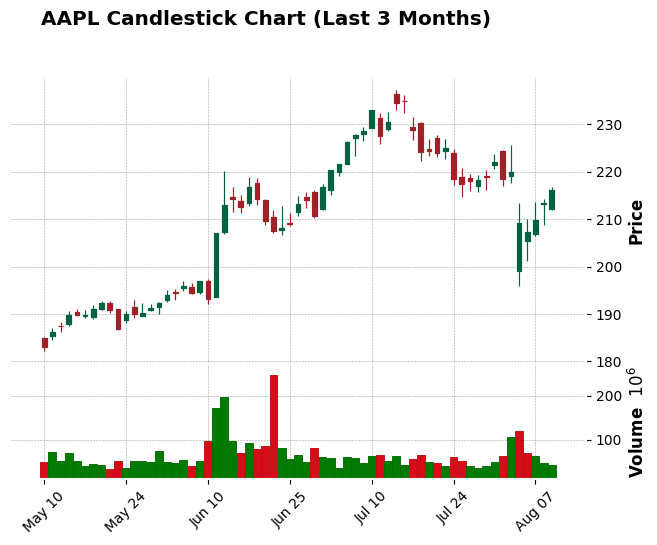

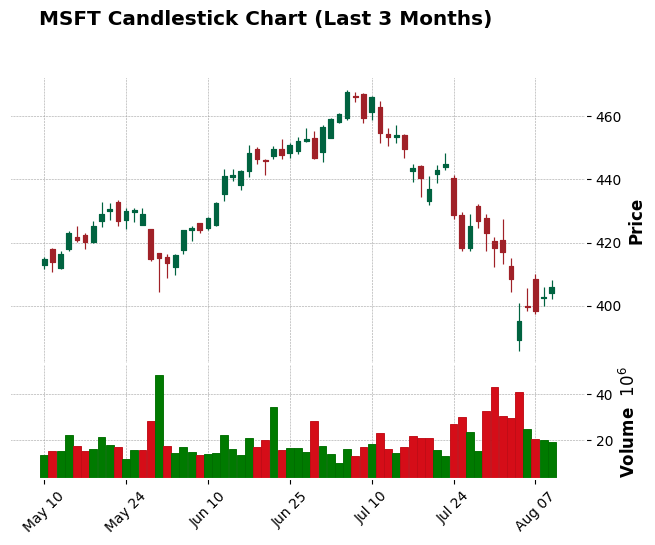

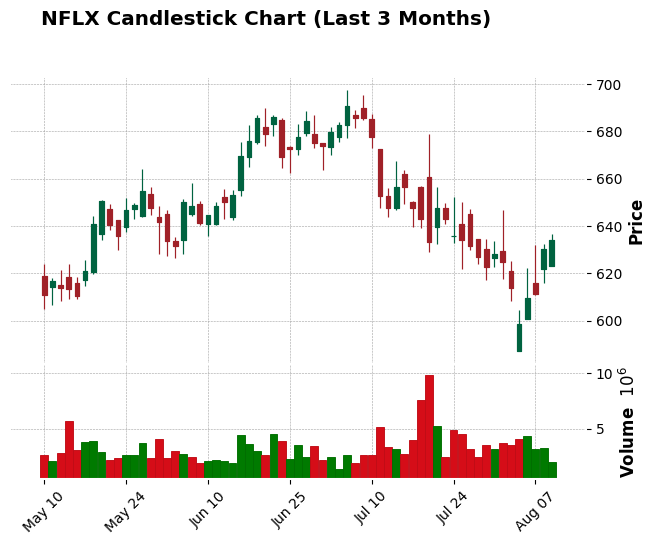

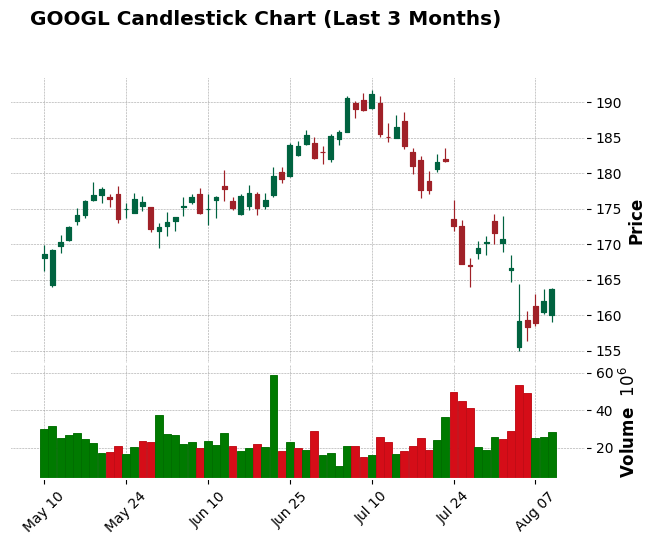

In [8]:
import yfinance as yf
import mplfinance as mpf

# Download historical data for the last three months
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
stock_data = {ticker: yf.download(ticker, period='3mo') for ticker in tickers}

# Plotting the candlestick charts for each stock
for ticker in tickers:
    mpf.plot(stock_data[ticker], type='candle', title=f'{ticker} Candlestick Chart (Last 3 Months)', 
             style='charles', volume=True)


[*********************100%%**********************]  4 of 4 completed
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA20'] = data['Close'].rolling(window=20).mean()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA50'] = data['Close'].rolling(window=50).mean()


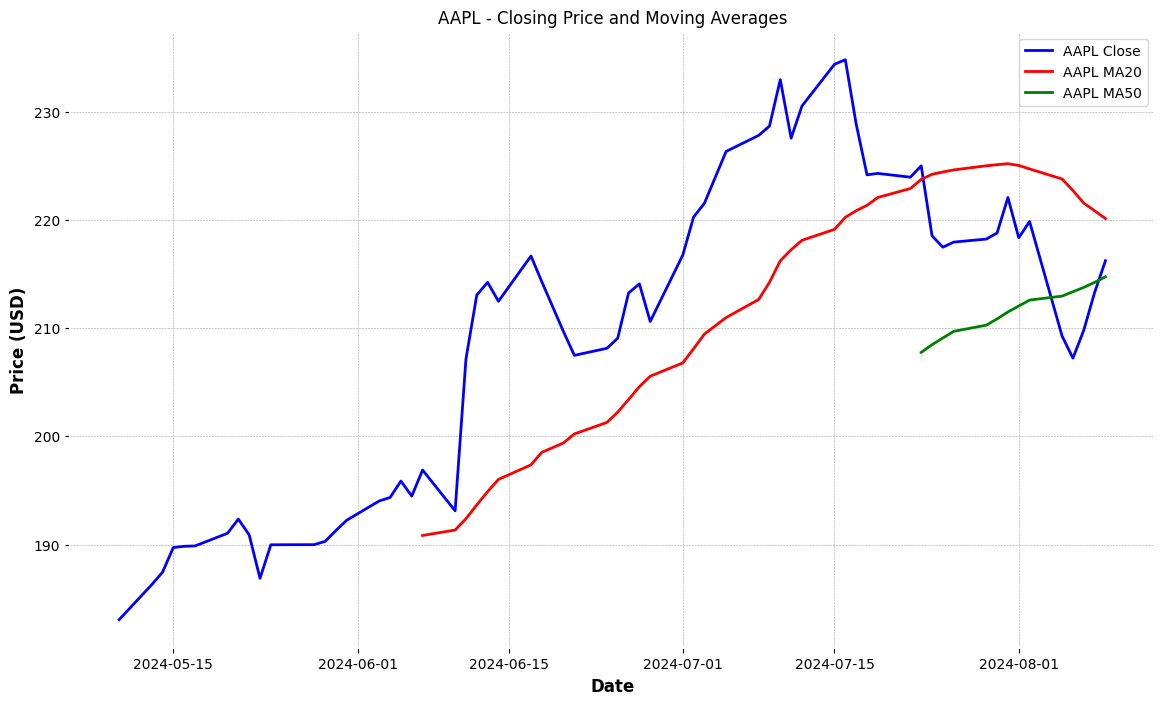

C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA20'] = data['Close'].rolling(window=20).mean()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA50'] = data['Close'].rolling(window=50).mean()


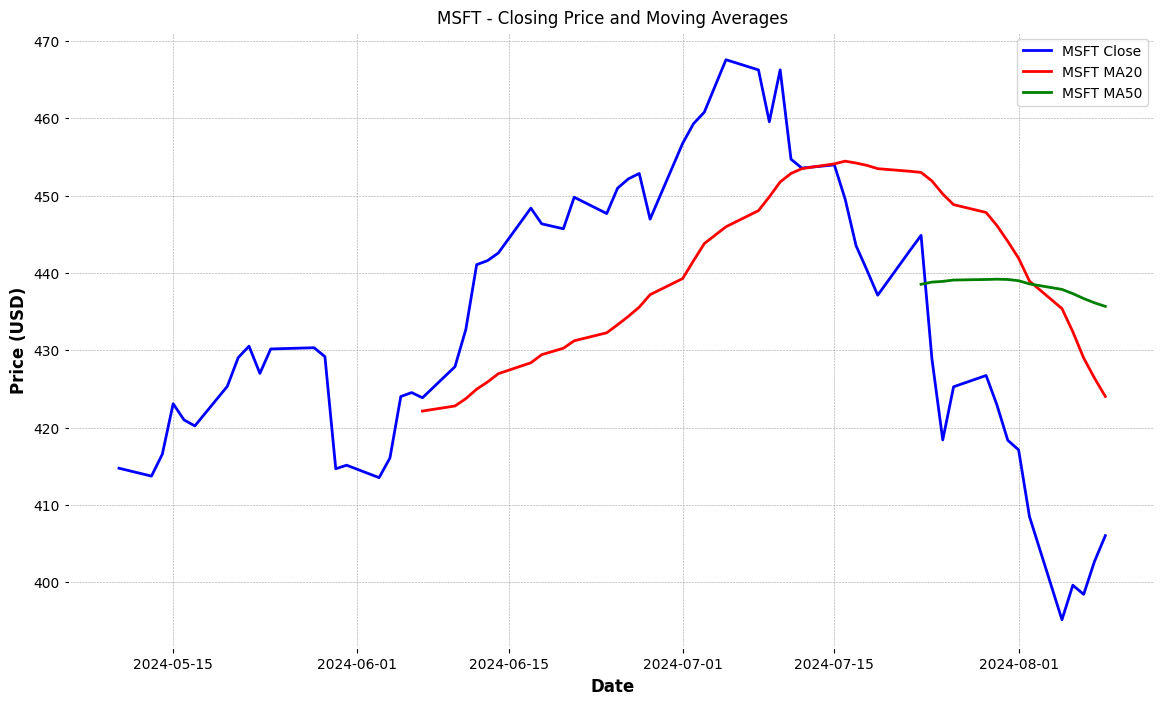

C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA20'] = data['Close'].rolling(window=20).mean()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA50'] = data['Close'].rolling(window=50).mean()


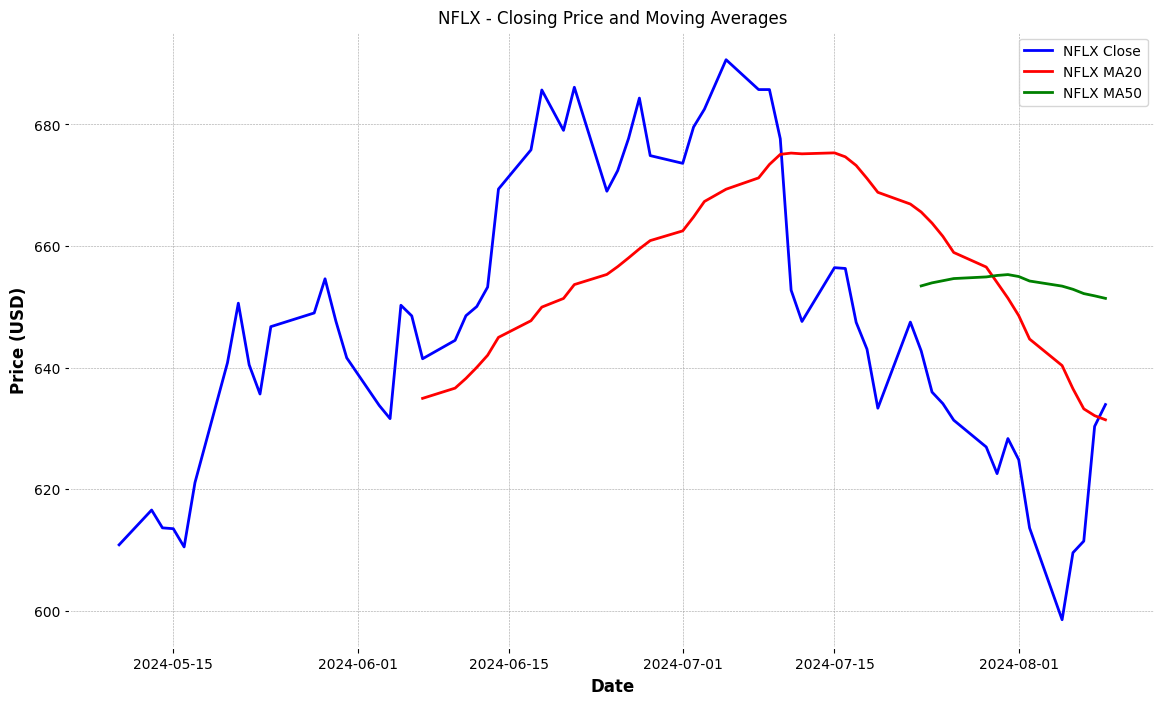

C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA20'] = data['Close'].rolling(window=20).mean()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\923410643.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MA50'] = data['Close'].rolling(window=50).mean()


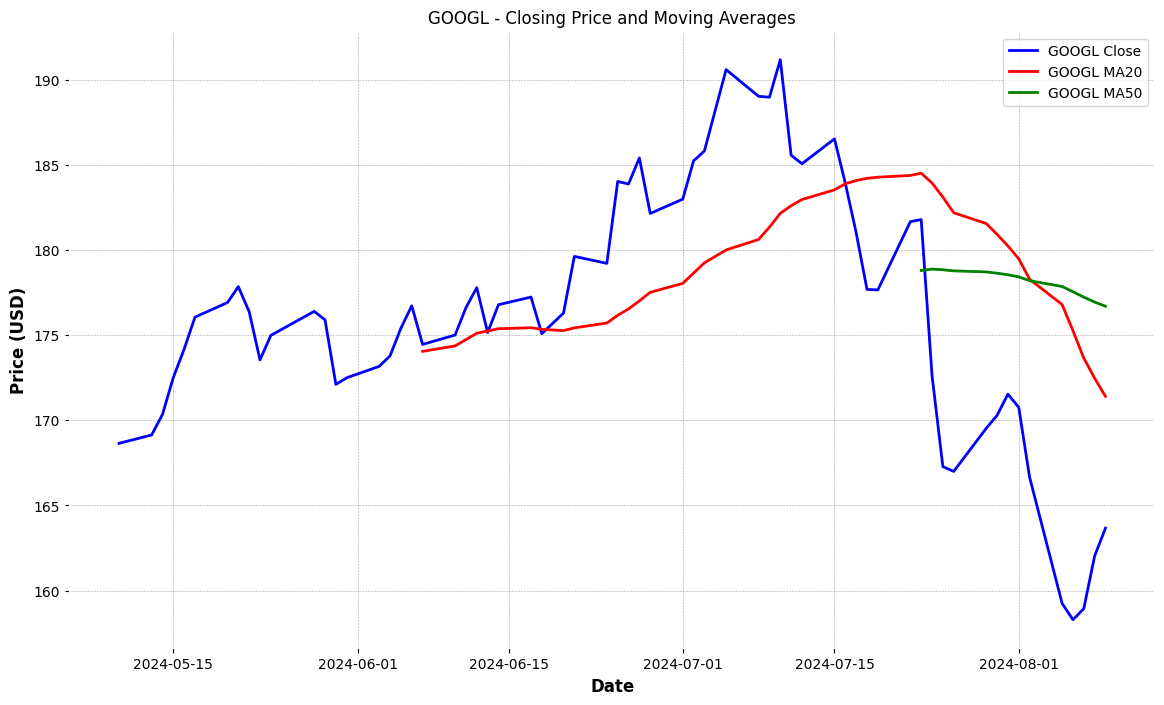

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and download data for the last 3 months
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
stock_data = yf.download(tickers, period='3mo', group_by='ticker')

# Loop through each ticker to calculate the moving averages
for ticker in tickers:
    # Ensure that you're accessing the correct DataFrame
    data = stock_data[ticker]
    
    # Calculate the 20-day and 50-day moving averages
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()

    # Plot the closing prices and moving averages
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label=f'{ticker} Close', color='blue')
    plt.plot(data.index, data['MA20'], label=f'{ticker} MA20', color='red')
    plt.plot(data.index, data['MA50'], label=f'{ticker} MA50', color='green')
    plt.title(f'{ticker} - Closing Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
import yfinance as yf
import pandas as pd

# Define the tickers and download data for the last 3 months
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
stock_data = yf.download(tickers, period='3mo', group_by='ticker')

# Initialize a dictionary to store volatility
volatility = {}

# Loop through each ticker to calculate daily returns and volatility
for ticker in tickers:
    # Ensure you're accessing the correct DataFrame
    data = stock_data[ticker]
    
    # Calculate daily returns
    data['Daily Return'] = data['Close'].pct_change()
    
    # Calculate the standard deviation of daily returns (volatility)
    vol = data['Daily Return'].std()
    volatility[ticker] = vol
    
    # Display the results for each stock
    print(f"{ticker} Volatility (Standard Deviation of Daily Returns): {vol:.4f}")

# Convert the volatility dictionary to a DataFrame for easy comparison
volatility_df = pd.DataFrame(list(volatility.items()), columns=['Ticker', 'Volatility'])
print("\nVolatility of each stock over the past 3 months:")
print(volatility_df)


[*********************100%%**********************]  4 of 4 completed

AAPL Volatility (Standard Deviation of Daily Returns): 0.0173
MSFT Volatility (Standard Deviation of Daily Returns): 0.0128
NFLX Volatility (Standard Deviation of Daily Returns): 0.0138
GOOGL Volatility (Standard Deviation of Daily Returns): 0.0152

Volatility of each stock over the past 3 months:
  Ticker  Volatility
0   AAPL    0.017259
1   MSFT    0.012757
2   NFLX    0.013762
3  GOOGL    0.015170



C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\4264280949.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Close'].pct_change()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\4264280949.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Close'].pct_change()
C:\Users\welcome\AppData\Local\Temp\ipykernel_9664\4264280949.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

[*********************100%%**********************]  4 of 4 completed


Correlation Matrix of Daily Returns:
           AAPL      MSFT      NFLX     GOOGL
AAPL   1.000000  0.534506  0.348422  0.535138
MSFT   0.534506  1.000000  0.557938  0.785950
NFLX   0.348422  0.557938  1.000000  0.559000
GOOGL  0.535138  0.785950  0.559000  1.000000


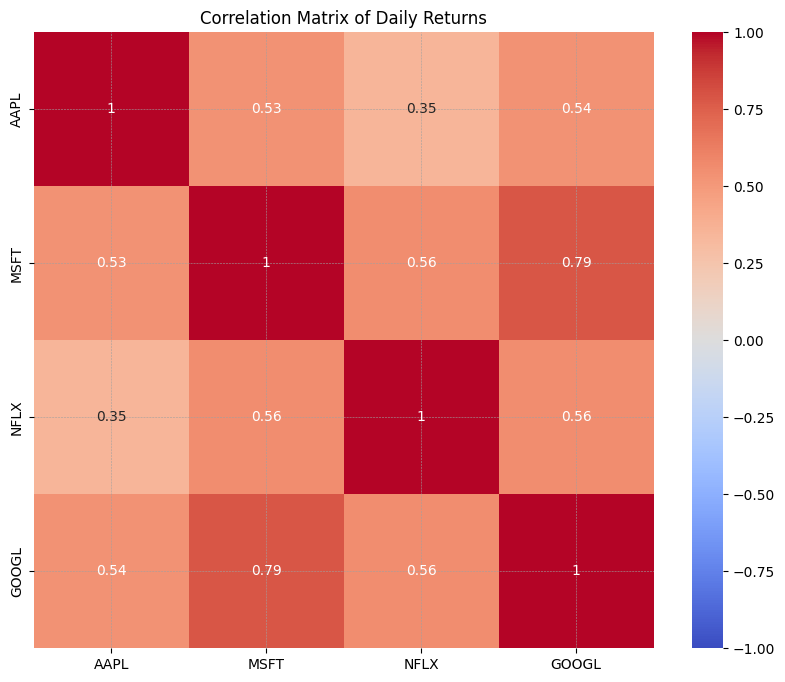

In [21]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers and download data for the last 3 months
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOGL']
stock_data = yf.download(tickers, period='3mo', group_by='ticker')

# Calculate daily returns for each stock and create a DataFrame
daily_returns = pd.DataFrame({ticker: stock_data[ticker]['Close'].pct_change() for ticker in tickers})

# Compute the correlation matrix
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


###  Report: Stock Market Performance Analysis


#### 1. Introduction

This report details the performance analysis of four leading technology companies: Apple Inc. (AAPL), Microsoft Corporation (MSFT), Netflix Inc. (NFLX), and Alphabet Inc. (GOOGL). The analysis covers a period of three months and encompasses trend analysis, moving averages, volatility measures, and correlation assessments.

#### 2. Data Collection

Historical stock price data was sourced using the `yfinance` API. The dataset includes daily records of:
- Open:  Opening price of the stock.
- High: Highest price during the trading day.
- Low: Lowest price during the trading day.
- Close: Closing price of the stock.
- Adjusted Close: Closing price adjusted for dividends and stock splits.
- Volume: Number of shares traded.

#### 3. Data Preprocessing

Data preprocessing steps included:
- Missing Values: No missing values were detected in the dataset.
- Daily Returns Calculation: The percentage change in the closing price from one day to the next was computed to determine daily returns.

#### 4. Trend Analysis

Trend Analysis: involves plotting the closing prices of each stock over the past three months to visualize their movements and identify trends.

- Apple Inc. (AAPL): Demonstrated a generally upward trend with several fluctuations. The stock showed resilience and growth potential.
- Microsoft Corporation (MSFT): Exhibited a steady upward trajectory, reflecting strong performance and stability in the market.
- Netflix Inc. (NFLX): Displayed significant volatility with frequent sharp movements, indicating a more unstable performance compared to its peers.
- Alphabet Inc. (GOOGL): Showed a relatively stable trend with moderate upward movements, suggesting consistent but less aggressive growth.

#### 5. Moving Averages

Moving Averages were computed to smooth price data and reveal longer-term trends. The following moving averages were used:
- 20-Day Moving Average: Represents short-term trends and captures recent price movements.
- 50-Day Moving Average: Represents long-term trends and provides insight into the overall direction.

- Apple Inc. (AAPL)    : The 20-day moving average frequently crossed the 50-day moving average, signaling periods of trend reversals and buying/selling opportunities.
- Microsoft Corporation (MSFT) : Showed a consistent positive slope in both moving averages, indicating a robust long-term upward trend with fewer fluctuations.
- Netflix Inc. (NFLX)  : Exhibited frequent crossovers between short-term and long-term moving averages, reflecting high volatility and potential trading opportunities.
- Alphabet Inc. (GOOGL): Demonstrated a steady trend with fewer crossovers, indicating a stable growth pattern.

#### 6. Volatility Analysis

Volatility     was measured by calculating the standard deviation of daily returns, providing insights into the risk associated with each stock.

- Apple Inc. (AAPL)    : Had moderate volatility, suggesting a balanced risk profile with periodic fluctuations.
- Microsoft Corporation (MSFT) : Exhibited the lowest volatility among the stocks, indicating relative stability and lower risk.
- Netflix Inc. (NFLX)    : Showed the highest volatility, reflecting greater risk and potential for substantial price swings.
- Alphabet Inc. (GOOGL)  : Displayed moderate volatility, suggesting a balanced risk profile with less extreme movements compared to Netflix.

#### 7. Correlation Analysis

The **correlation matrix** was computed to assess the relationships between daily returns of the different stocks. The correlation matrix helps in understanding how stocks move relative to each other:

-  High Positive Correlations : AAPL and MSFT showed high positive correlations, indicating that their returns tend to move in the same direction.
-  Moderate Positive Correlations: AAPL and GOOGL, as well as MSFT and GOOGL, exhibited moderate positive correlations, suggesting some level of synchronized movement.
-  Lower Correlation : NFLX demonstrated a lower correlation with the other stocks, indicating more independent price movements.

#### 8. Insights and Recommendations

1. **Trend Insights**:
   - AAPL and MSFT showed strong upward trends, making them attractive for investors seeking growth.
   - NFLX exhibited high volatility, suitable for traders looking for short-term opportunities but with higher risk.
   - GOOGL provided consistent, moderate growth, appealing to those seeking stability.

2. # Moving Average Insights:
   - Regular crossovers in **AAPL** and **NFLX** suggest active trading opportunities.
   - **MSFT** and **GOOGL** showed more stable trends, reflecting solid long-term investment potential.

3. # Volatility Insights:
   - NFLX presents higher risk but potential for higher returns.
   - MSFT offers lower risk and stability, making it suitable for conservative investors.

4. **Correlation Insights**:
   - Stocks with high positive correlations can be grouped for diversified investments.
   - Lower correlation with **NFLX** indicates potential benefits from diversification strategies.

#### 9. Conclusion

This analysis provides valuable insights into the performance, risk, and relationships of AAPL, MSFT, NFLX, and GOOGL. Investors can use these findings to make informed decisions, balancing potential returns with associated risks.

